In [1]:
"""Работа с файлами в Google Colab."""

'Работа с файлами в Google Colab.'

## Работа с файлами в Google Colab
- Для построения модели нам нужны данные. И очень часто эти данные содержатся во внешних файлах. Мы уже столкнулись с этим, когда работали с рекомендательными системами и временными рядами. Предлагаю сегодня рассмотреть этот вопрос более детально.
## Общее описание процесса

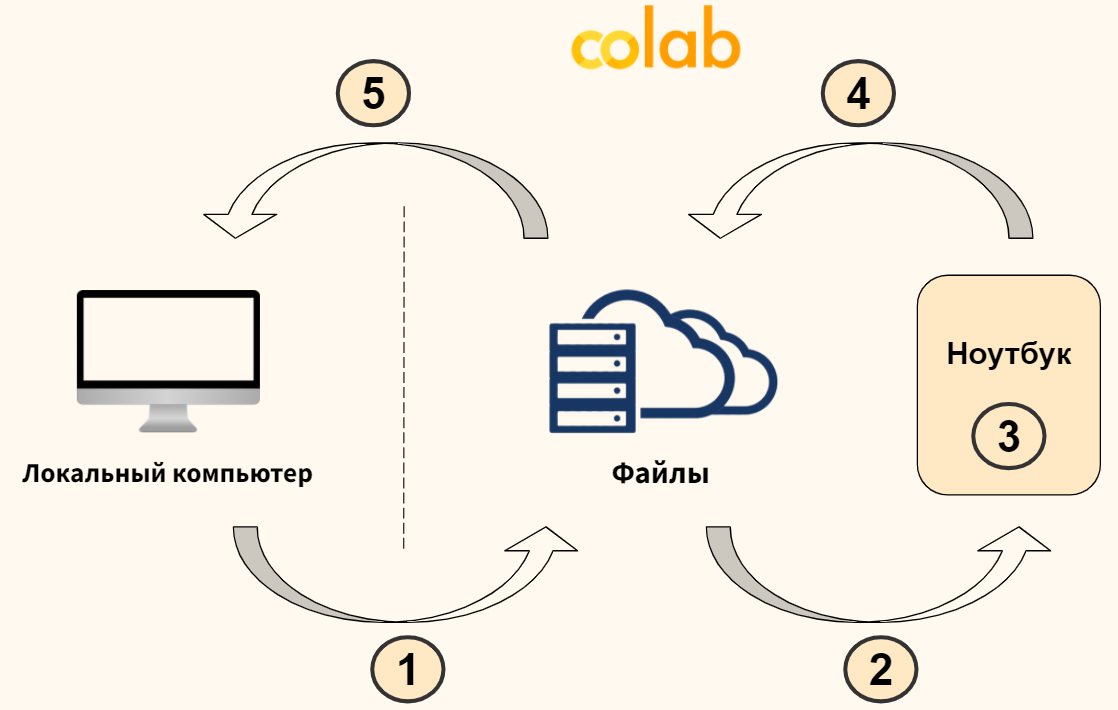

- В целом работа с файлами в Google Colab состоит из следующих этапов.
    - Этап 1. Подгрузка файлов с локального компьютера на сервер Google.
    - Этап 2. Чтение файла.
    - Этап 3. Построение модели и прогноз.
    - Этап 4. Сохранение результата в новом файле на сервере Google.
    - Этап 5. Скачивание обратно на жесткий диск.
- Пройдемся по каждому из них. Но прежде поговорим про данные.
## Датасет «Титаник»
- На этом занятии предлагаю взять датасет о пассажирах корабля «Титаник», который, как известно, затонул в 1912 году при столкновении с айсбергом. Часть пассажиров выжила, но многие, к сожалению, погибли. В приведенном ниже датасете собрана информация о самих пассажирах (признаки), а также о том, выжили они или нет (целевая переменная).

## Этап 1. Подгрузка файлов в Google Colab
- Если внешние файлы хранятся на локальном компьютере, то нам нужно подгрузить их в так называемое «Сессионное хранилище» (session storage, по сути, сервер Google).
- Подгрузить данные с локального компьютера можно двумя способами.
### Способ 1. Вручную через вкладку «Файлы»
- Этот способ мы использовали до сих пор. В качестве напоминания приведу скриншоты подгрузки файла train.csv.

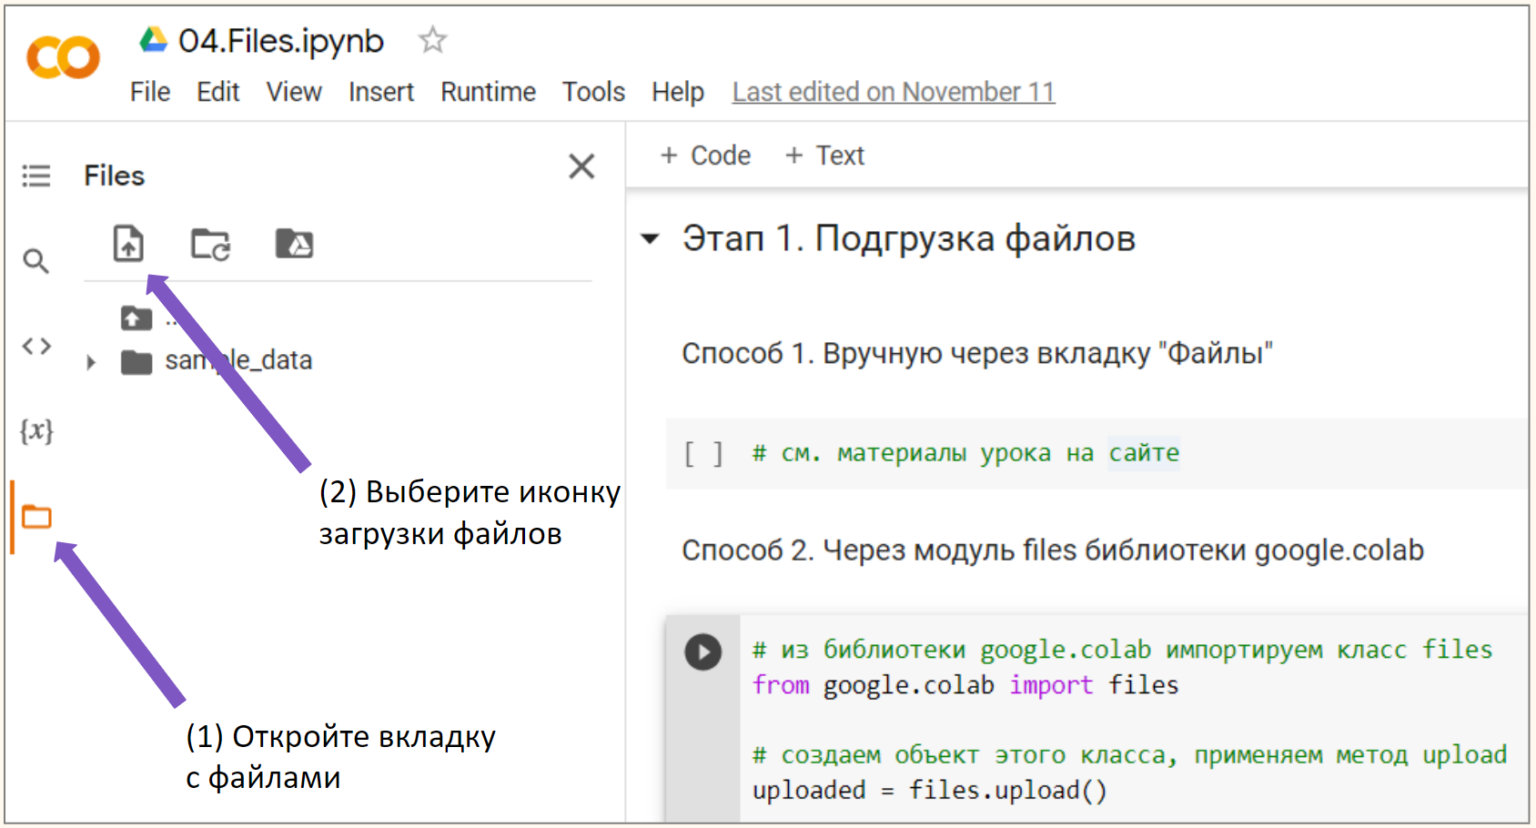

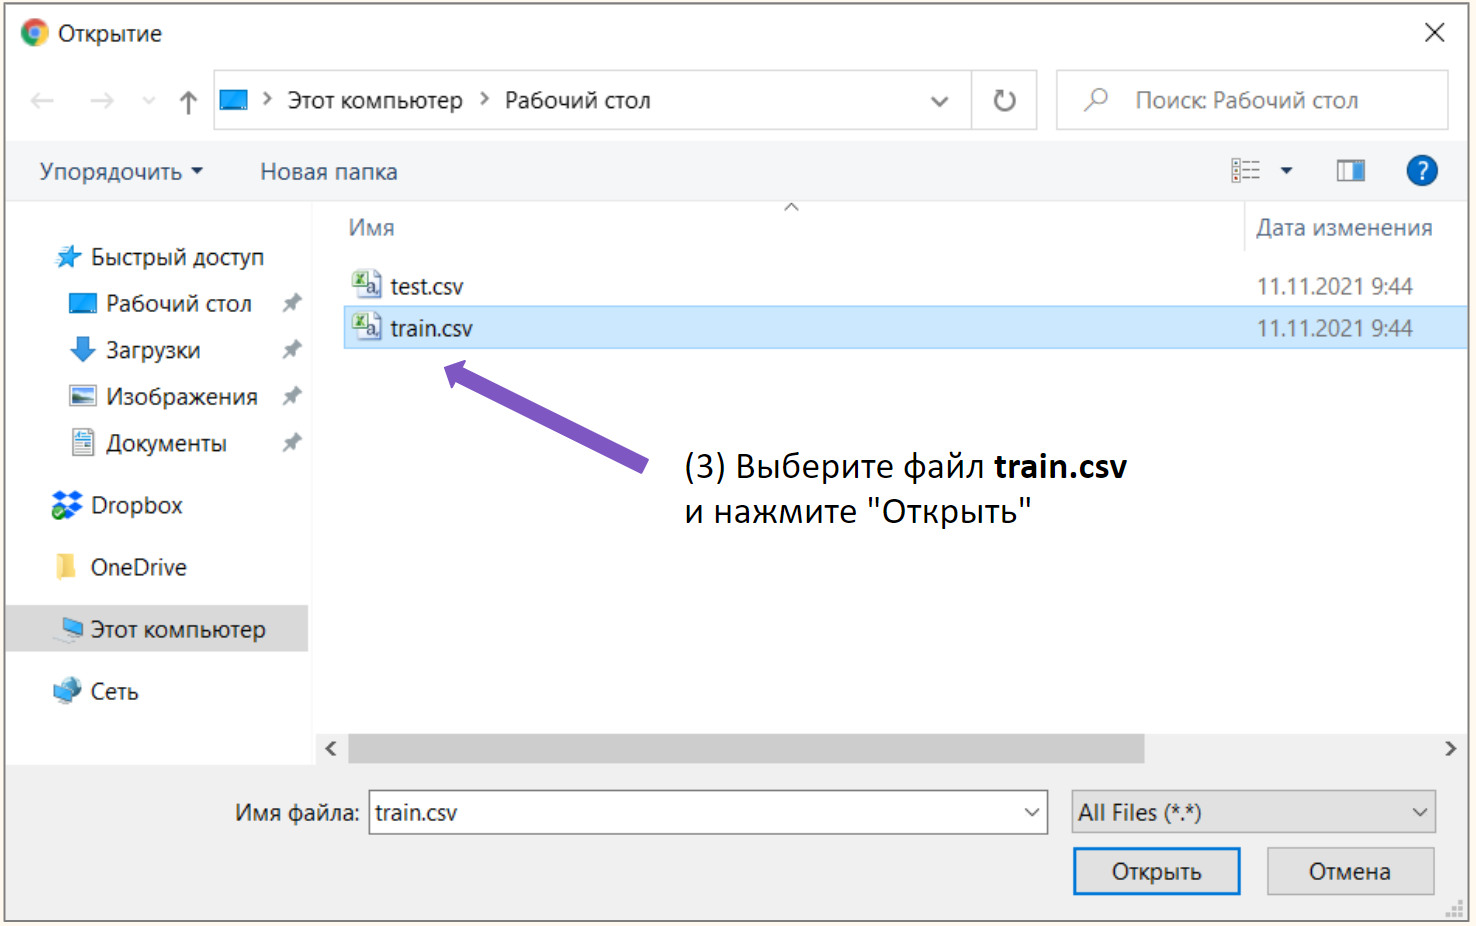

### Способ 2. Через объект files библиотеки google.colab
- К объекту files мы применяем метод .upload(), который передает нам словарь. Ключами этого словаря будут названия файлов, а значениями — сами подгруженные данные. Приведем пример с файлом test.csv.

In [ ]:
import os

# from google.colab import files

# из библиотеки google.colab импортируем класс files

# создаем объект этого класса, применяем метод .upload()
# uploaded: dict[str, bytes] = files.upload()

- Нам будет предложено выбрать файл на жестком диске.

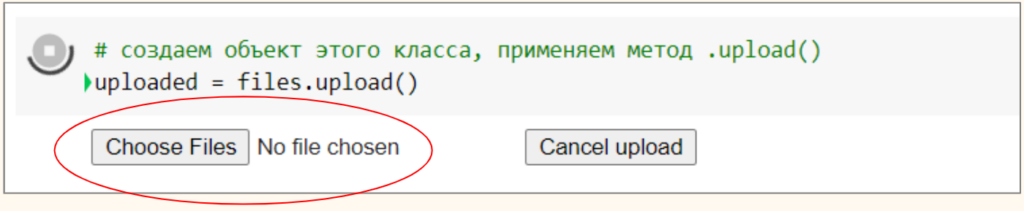

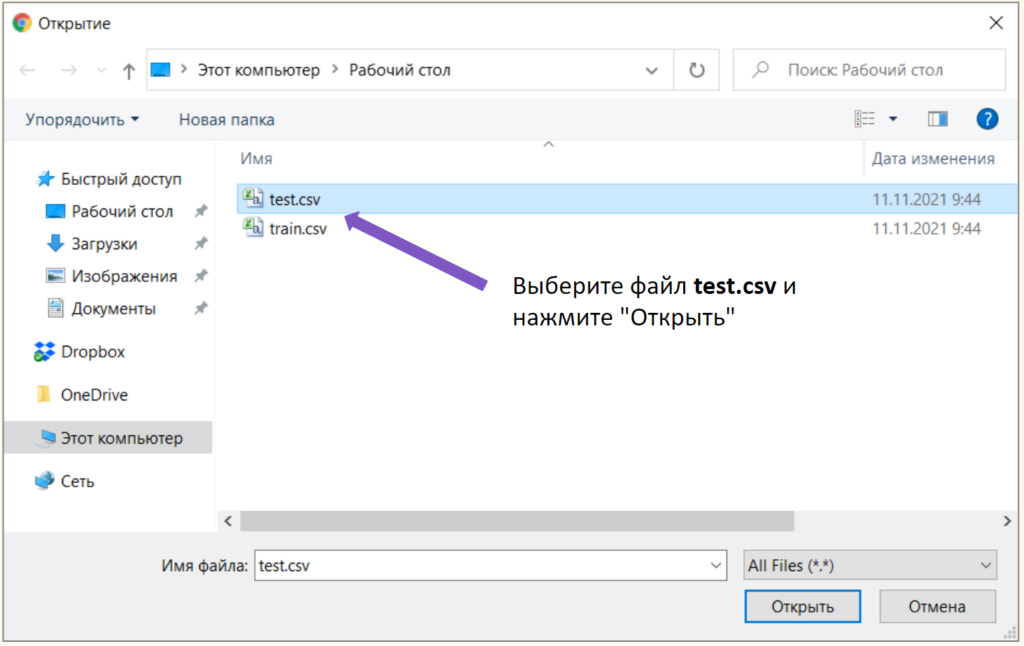

- Все что идет после двоеточия и есть наш файл. Он содержится в формате bytes, о чем свидетельствует буква b перед строкой файла (подробнее об этом ниже).

## Этап 2. Чтение файлов
- После загрузки оба файла (train.csv и test.csv) оказываются в сессионном хранилище в папке под названием /content/.

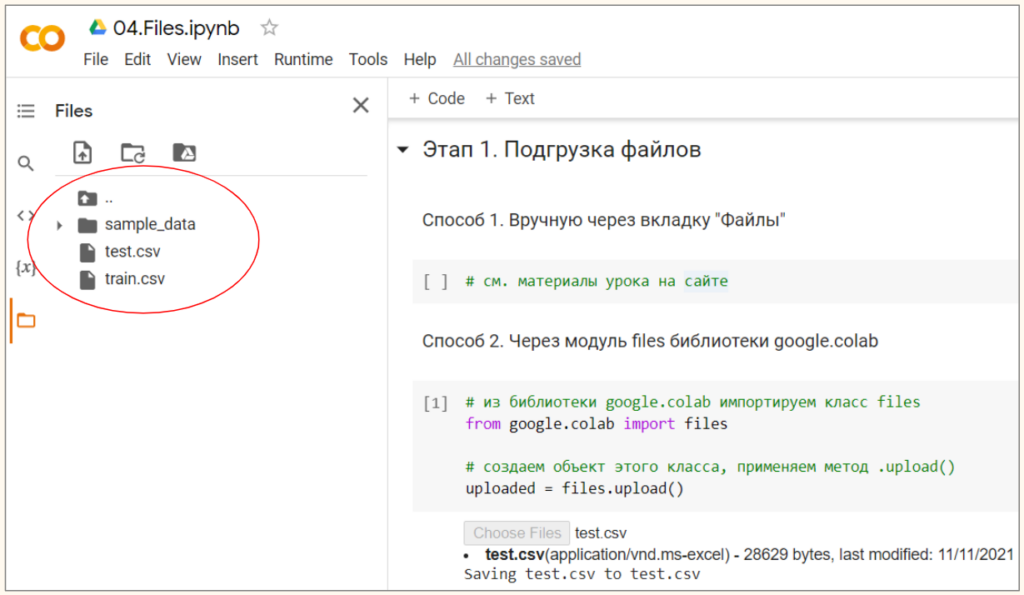

### Просмотр содержимого в папке /content/
### Модуль os и метод .walk()
- Для того чтобы просмотреть ее содержимое внутри блокнота, мы можем воспользоваться модулем os (отвечает за взаимодействие Питона с операционной системой) и, в частности, методом .walk() (позволяет «пройтись» по содержимому конкретной папки).

In [ ]:
# импортируем модуль os
# import os

# выводим пути к папкам (dirpath) и наименования файлов (filenames) и после этого
for dirpath, _, filenames in os.walk("/content/"):

    # во вложенном цикле проходимся по названиям файлов
    for filename in filenames:

        # и соединяем путь до папок и входящие в эти папки файлы
        # с помощью метода path.join()
        print(os.path.join(dirpath, filename))

- Первые два файла и есть наши данные. В скрытой подпапке /.config/ содержатся служебные файлы, а в подпапке /sample_data/ — примеры датасетов, хранящихся в Google Colab по умолчанию.

### Команда !ls
- Кроме того, если нас интересуют только видимые файлы и папки, мы можем воспользоваться командой !ls (ls означает to list, т.е. «перечислить»).

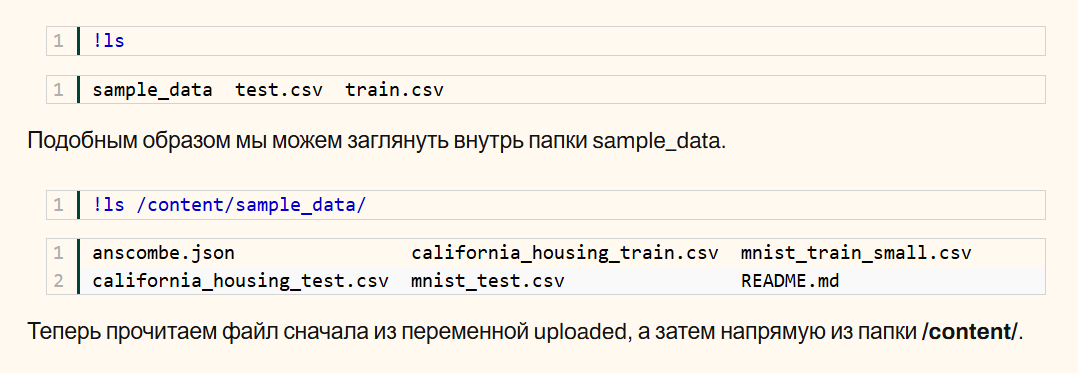

### Чтение из переменной uploaded

- Как мы уже сказали выше, в словаре uploaded файл содержится в формате bytes.

In [ ]:
# посмотрим на тип значений словаря uploaded
# type(uploaded['test.csv'])

- Основная особенность: информация в объекте bytes представляет собой последовательность байтов (byte string), в то время как обычная строка — это последовательность символов (character string). Компьютер понимает первый тип, мы (люди) — второй.
- Для того чтобы прочитать информацию из объекта bytes, ее нужно декодировать (decode). Если мы захотим вернуть ее обратно в объект bytes, соответственно, закодировать (encode).

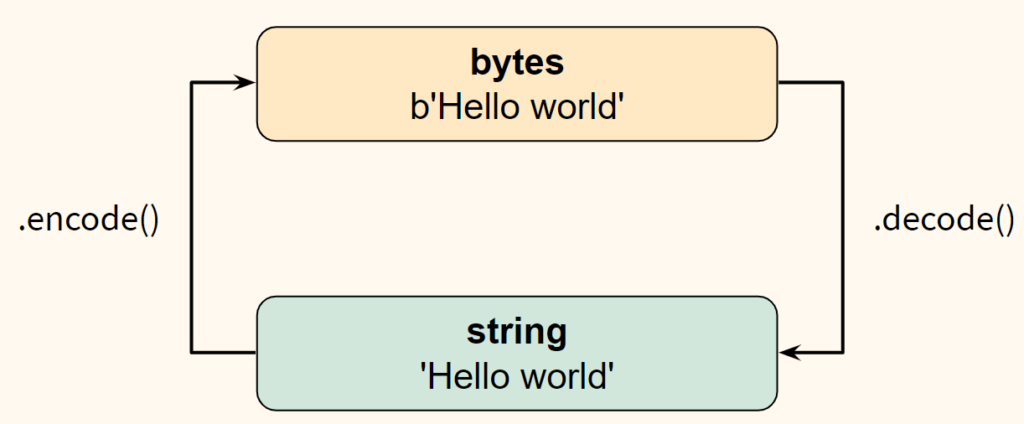

- Таким образом, чтобы прочитать данные напрямую из словаря uploaded, вначале нам нужно преобразовать эти данные в обычную строку.

In [ ]:
# обратимся к ключу словаря uploaded и применим метод .decode()
# uploaded_str: str = uploaded['test.csv'].decode()

# на выходе получаем обычную строку
# print(type(uploaded_str))

- Выведем первые 35 значений.

In [ ]:
# print(uploaded_str[:35])

- Если разбить строку методом .split() по символам \r (возврат к началу строки) и \n (новая строка), то на выходе мы получим список.

In [ ]:
# uploaded_list: list[str] = uploaded_str.split('\r\n')
# type(uploaded_list)

- Пройдемся по этому списку и выведем первые четыре значения.

In [ ]:
# не забудем создать индекс с помощью функции enumerate()
# for i, line in enumerate(uploaded_list):

# начнем выводить записи
# print(line)

# когда дойдем до четвертой строки
# if i == 3:

# прервемся
# break

- Вот нам и пригодился оператор break. Как мы видим, первая строка — это заголовок (header), остальные — информация по каждому из пассажиров.

### Использование функции open() и конструкции with open()
- Такого же результата можно добиться с помощью базовой функции open().
- Функция open() возвращает объект, который используется для чтения и изменения файла. Откроем файл train.csv.

In [ ]:
# передадим функции open() адрес файла
# параметр 'r' означает, что мы хотим прочитать (read) файл
# f1: TextIO = open('/content/train.csv', 'r')

- Вначале попробуем применить метод .read().

In [ ]:
# метод .read() помещает весь файл в одну строку
# выведем первые 142 символа (если параметр не указывать,
# выведется все содержимое)
# print(f1.read(142))

# в конце файл необходимо закрыть
# f1.close()

- Для наших целей метод .read() не очень удобен. Будет лучше пройтись по файлу в цикле for.

In [ ]:
# снова откроем файл
# f2: TextIO = open('/content/train.csv', 'r')

# пройдемся по нашему объекту в цикле for и параллельно создадим индекс
# for i, line in enumerate(f2):

# выведем строки без служебных символов по краям
# print(line.strip())

# дойдя до четвертой строки, прервемся
# if i == 3:
# break

# не забудем закрыть файл
# f2.close()

- Еще один способ — использовать конструкцию with open(). В этом случае специально закрывать файл не нужно.

In [ ]:
# скажем Питону: "открой файл и назови его f3"
# with open('/content/test.csv', 'r') as f3:

# "пройдись по строкам без служебных символов"
# for i, line in enumerate(f3):
# print(line.strip())

# и "прервись на четвертой строке"
# if i == 3:
# break

## Чтение через библиотеку Pandas

- Вероятно наиболее удобный и подходящий для наших целей способ чтения файлов — 
это преобразование напрямую в датафрейм библиотеки Pandas. С этим методом в целом мы уже знакомы.

In [ ]:
# импортируем библиотеку
# import pandas as pd
# применим функцию read_csv() и посмотрим на первые
# три записи файла train.csv
# train = pd.read_csv('/content/train.csv')
# train.head(3)

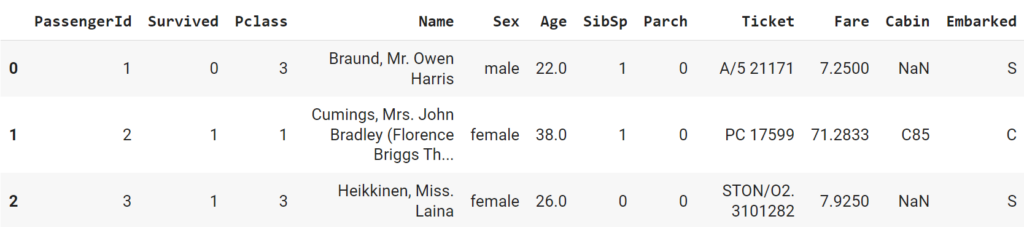

In [2]:
# сделаем то же самое с файлом test.csv
# test = pd.read_csv('/content/test.csv')
# test.head(3)

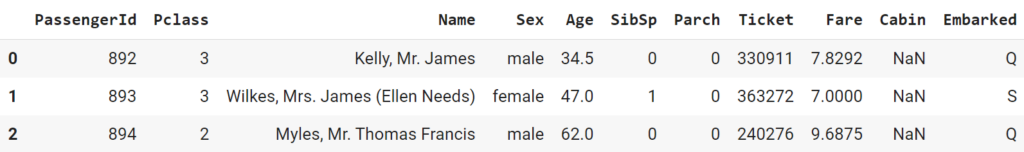

## Этап 3. Построение модели и прогноз
- Давайте ненедолго отвлечемся от работы с файлами и построим несложную модель, 
которая предскажет погиб пассажир (обозначим этот факт через 0) или выжил (1). Прежде всего, концептуально обсудим, что нам нужно сделать.
    - Шаг 1. Обработать и проанализировать данные;
    - Шаг 2. Разделить обучающую выборку (train) на признаки (X_train) и целевую переменную (y_train);
    - Шаг 3. Обучить модель логистической регрессии;
    - Шаг 4. Подготовить тестовые данные (X_test) и сделать прогноз.
-  теперь обо всем по порядку.

## Шаг 1. Обработка и анализ данных
### Исследовательский анализ данных (EDA)
- Напомню, что основная задача EDA — выявить взаимосвязь между признаками и целевой переменной. Воспользуемся методом .info(), чтобы обобщенно посмотреть на наши данные.

In [3]:
# train.info()

- Как мы видим, у нас 12 переменных. Одна из них (Survived) — зависимая (целевая), остальные — независимые (признаки). Всего в датасете 891 запись, при этом в нескольких переменных есть пропуски.
- Ниже приведено короткое описание каждой из переменных:
    - PassengerId — идентификатор пассажира
    - Survived — погиб (0) или выжил (1)
    - Pclass — класс билета: первый (1), второй (2) или третий (3)
    - Name — имя пассажира
    - Sex — пол
    - Age — возраст
    - SibSp — количество братьев и сестер или супругов (siblings and spouses) на борту
    - Parch — количество родителей и детей (parents and children) на борту
    - Ticket — номер билета
    - Fare — стоимость билета
    - Cabin — номер каюты
    - Embarked — порт посадки (C — Шербур; Q — Квинстаун; S — Саутгемптон)
- Проведем несложный визуальный анализ данных.

In [ ]:
# для построения графиков воспользуемся
# новой для нас
# библиотекой seaborn
# import seaborn as sns

- У нас есть несколько потенциально значимых категориальных переменных, целевая переменная — тоже категориальная. В этом случае удобно использовать столбчатую диаграмму (bar chart), где каждый столбец также разбит на категории. В библиотеке seaborn такую диаграмму можно построить с помощью функции countplot().

In [ ]:
# посмотрим насколько значим класс билета для выживания пассажира
# с помощью x и hue мы можем уместить две категориальные переменные
# на одном графике
# sns.countplot(x = 'Pclass', hue = 'Survived', data = train)

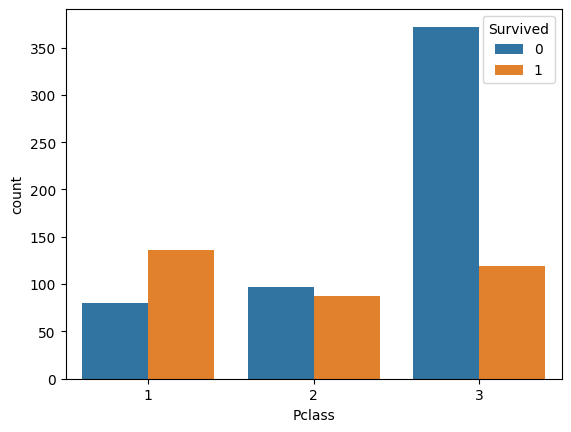

- Мы видим, что погибших пассажиров в третьем классе гораздо больше, чем выживших. При этом в первом классе больше выживших, чем погибших. Очевидно класс билета имеет значение.

In [ ]:
# кто выживал чаще, мужчины или женщины?
# sns.countplot(x = 'Sex', hue = 'Survived', data = train)

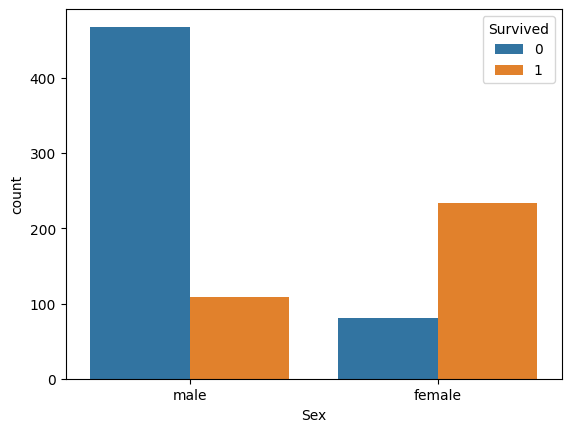

- Большинство мужчик погибло. Большая часть женщин выжила. Пол также значим для построения прогноза.

### Пропущенные значения
- Посмотрим, что можно сделать с пропущенными значениями (missing values).

In [ ]:
# выявим пропущенные значения с помощью .isnull()
# и посчитаем их количество через sum()
# train.isnull().sum()

- Больше всего пропущенных значений в переменной Cabin. Они также 
есть в переменных Age и Embarked.

In [ ]:
# переменная Cabin (номер каюты), скорее всего, не является самой важной
# избавимся от нее с помощью метода .drop()
# (параметр axis отвечает за столбцы, inplace = True сохраняет изменения)
# train.drop(columns = 'Cabin', axis = 1, inplace = True) # pylint: disable=line-too-long
# а вот Age (возраст) точно важен, заменим пустые значения средним арифметическим
# train['Age'] = train['Age'].fillna(train['Age'].mean())

- В данном случае мы применили метод .fillna(), то есть «заполнить пропуски», 
к столбцу Age (через train['Age']) и заполнили пропуски средним значением этого
 же столбца через train['Age'].mean().

In [5]:
# у нас остаются две пустые строки в Embarked, удалим их
# train.dropna(inplace = True)

- Посмотрим на результат.

In [6]:
# train.isnull().sum()

## Категориальные переменные
- Теперь нужно поработать с категориальными переменными (categorical variable). Как мы помним, модель не сможет подобрать веса, если значения выражены словами (например, male и female в переменной Sex или C, Q, S в переменной Embarked).
- Кроме того, даже когда категория выражена числами, иногда мы все равно не можем оставить ее без изменения. Например, если не трогать переменную Pclass, то модель воспримет классы 1, 2 и 3 как количественную переменную (как если бы это была цена или возраст), а не как категорию.
- И в первом, и во втором случае к переменным можно применить one-hot encoding. Мы уже познакомились с этим методом, когда разбирали нейронные сети. В библиотеке Pandas есть функция .get_dummies(), которая как раз и выполнит необходимые преобразования.
- Применим эту функцию на практике.

In [ ]:
# применим one-hot encoding к переменной Sex (пол) с помощью функции pd.get_dummies()

# pd.get_dummies(train['Sex']).head(3)

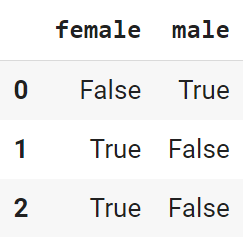

- Первый пассажир — мужчина (в колонке male стоит True), второй и третий — женщины (False).
- Заметим, что в предыдущей версии pd.get_dummies() логические значения обозначались через 0 и 1. Теперь же по умолчанию используются True и False. Для того чтобы вернуться к прежнему обозначению можно использовать параметр dtype = int.

In [ ]:
# вновь скачаем датафрейм с единственным столбцом Sex
# previous = pd.read_csv('/content/train.csv')[['Sex']]
# previous.head()

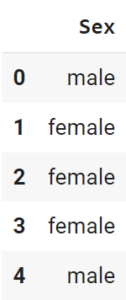

In [7]:
# закодируем переменную через 0 и 1
# pd.get_dummies(previous['Sex'], dtype = int).head(3)

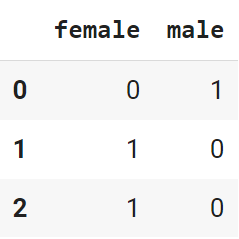

- Заметим, что Питон воспринимает 0 и 1, и True и False как одно и то же, поэтому это изменение никак не повлияет на исполнение другого кода.
- Помимо этого, если присмотреться, то станет очевидно, что мы можем обойтись только одним столбцом. В частности, в столбце male уже содержится достаточно информации о поле (True — мужчина, False — женщина). Это значит, что первый столбец можно удалить.

In [8]:
# удалим первый столбец, он избыточен
# sex = pd.get_dummies(train['Sex'], drop_first = True)
# sex.head(3)

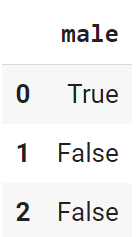

- Сделаем то же самое для переменных Pclass и Embarked.

In [9]:
# embarked = pd.get_dummies(train['Embarked'], drop_first = True)
# pclass = pd.get_dummies(train['Pclass'], drop_first = True)

- Еще раз замечу, что переменную Survived трогать не надо. Она уже выражена через 0 и 1.
- Присоединим новые (закодированные) переменные к исходному датафрейму train. Для этого используем функцию .concat().

In [10]:
# train = pd.concat([train, pclass, sex, embarked], axis = 1)
# train.head(3)

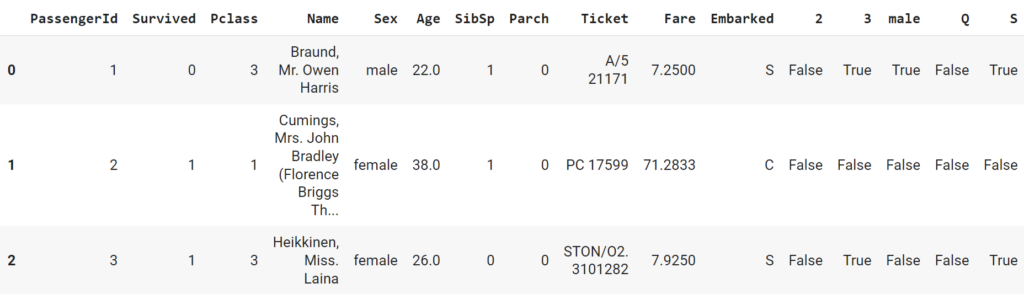

## Отбор признаков
- Теперь давайте отберем те переменные (feature selection), которые мы будем использовать в модели:
    - в первую очередь, удалим исходные (до применения one-hot encoding) переменные Sex, Pclass и Embarked;
    - кроме того, переменные PassengerId, Name и Ticket вряд ли скажут что-то определенное о шансах на выживание пассажира, удалим и их.

In [ ]:
# применим метод .drop() к соответствующим столбцам
# train.drop(['PassengerId', 'Pclass', 'Name', 'Sex', 'Ticket', 'Embarked'], axis = 1,
# inplace = True)
# train.head(3)

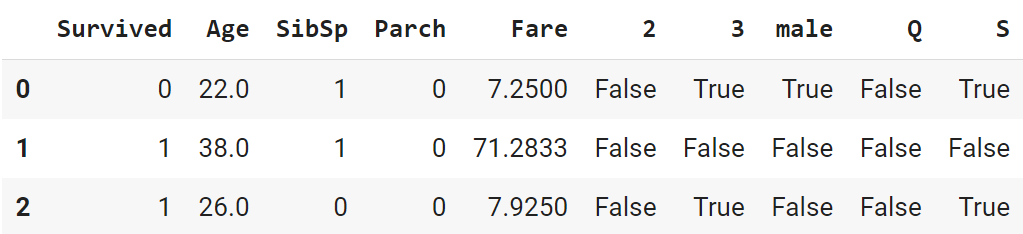

- Как вы видите, теперь все переменные либо количественные (Age, SibSp, Parch, Fare), либо категориальные и выражены через True и False (или 0 и 1 в случае Survived).

### Нормализация данных
- На занятиях по классификации и кластеризации мы уже говорили о важности приведения количественных переменных к одному масштабу. В противном случае модель может придать неоправданно большое значение признаку с большим масштабом.

In [12]:
# импортируем класс StandardScaler
# from sklearn.preprocessing import StandardScaler

# создадим объект этого класса
# scaler = StandardScaler()

# выберем те столбцы, которые мы хотим масштабировать
# cols_to_scale = ['Age', 'Fare']

# рассчитаем среднее арифметическое и СКО для масштабирования данных
# scaler.fit(train[cols_to_scale])

# применим их
# train[cols_to_scale] = scaler.transform(train[cols_to_scale])

# посмотрим на результат
# train.head(3)

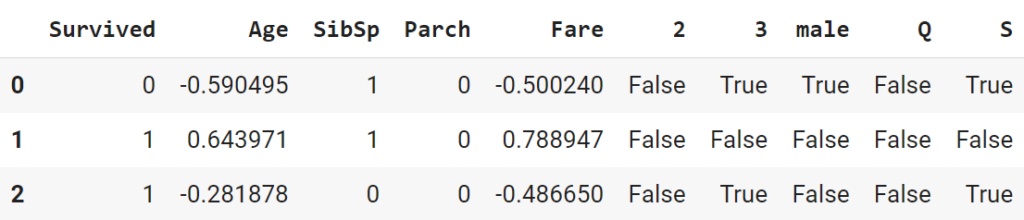

- Остается небольшой технический момент. Название переменных 2 и 3 (второй и третий классы) выражены числами, а не строками (их выдает отсутствие кавычек в коде ниже). Так быть не должно.

In [ ]:
# train.columns

- Преобразуем эти переменные в тип str через функцию map().

In [ ]:
# train.columns = train.columns.map(str)
# train.columns

## Шаг 2. Разделение обучающей выборки
- Разделим обучающую выборку на признаки и целевую переменную.

In [ ]:
# поместим в X_train все кроме столбца Survived
# X_train = train.drop('Survived', axis = 1)

# столбец 'Survived' станет нашей целевой переменной (y_train)
# y_train = train['Survived']
# X_train.head(3)

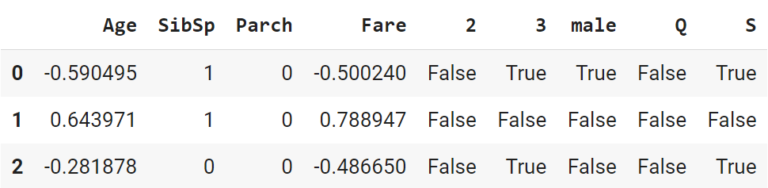

## Шаг 3. Обучение модели логистической регрессии
- Воспользуемся моделью логистической регрессии из библиотеки sklearn и передадим ей обучающую выборку.

In [13]:
# импортируем логистическую регрессию из модуля linear_model библиотеки sklearn
# from sklearn.linear_model import LogisticRegression

# создадим объект этого класса и запишем его в переменную model
# model = LogisticRegression()

# обучим нашу модель
# model.fit(X_train, y_train)

- Остается сделать прогноз и оценить качество модели. При этом обратите внимание, что в тестовых данных отсутствует целевая переменная (почему это так, расскажу ниже), поэтому чтобы иметь хоть какое-то представление о качестве модели, нам необходимо вначале использовать обучающую выборку для построения прогноза.

In [15]:
# сделаем предсказание класса на обучающей выборке
# y_pred_train = model.predict(X_train)

- Теперь мы можем сравнить прогнозные значения с фактическими. Построим матрицу ошибок (confusion matrix).

In [ ]:
# построим матрицу ошибок
# from sklearn.metrics import confusion_matrix

# передадим ей фактические и прогнозные значения
# conf_matrix = confusion_matrix(y_train, y_pred_train)

# преобразуем в датафрейм
# conf_matrix_df = pd.DataFrame(conf_matrix)
# conf_matrix_df

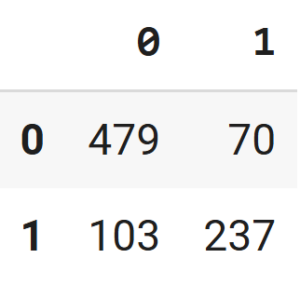

- Для удобства интерпретации добавим подписи.

In [ ]:
# conf_matrix_labels = pd.DataFrame(conf_matrix, columns = ['Прогноз погиб', 'Прогноз выжил'], index = ['Факт погиб', 'Факт выжил'])
# conf_matrix_labels

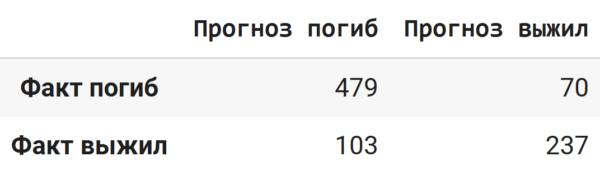

- Также давайте посмотрим на метрику accuracy. Она показывает долю правильно предсказанных значений. То есть мы берем тех, кого верно предсказали как погибших (true negative, TN, таких было 479), и тех, кого верно предсказали как выживших (true positive, TP, 237), и делим на общее число прогнозов.

In [ ]:
# рассчитаем метрику accuracy вручную
# round((479 + 237)/(479 + 237 + 70 + 103), 3)

In [ ]:
# импортируем метрику accuracy из sklearn
# from sklearn.metrics import accuracy_score

# так же передадим ей фактические и прогнозные значения
# model_accuracy = accuracy_score(y_train, y_pred_train)

# округлим до трех знаков после запятой
# round(model_accuracy, 3)

- На обучающей выборке наша модель показала результат в 80,4%. При этом только на тестовой выборке мы можем объективно оценить качество нашего алгоритма.

## Шаг 4. Построение прогноза на тестовых данных
- Посмотрим на тестовые данные.

In [16]:
# test.info()

In [17]:
# test.head(3)

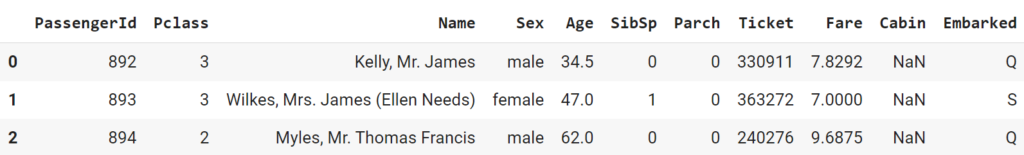

- Взглянув на сводку по тестовым данным, становится заметна одна сложность. Мы обучили модель на обработанных данных. В частности, мы заполнили пропуски, закодировали категориальные переменные и убрали лишние признаки. Кроме того, мы масштабировали количественные переменные и превратили названия столбцов в строки.
- Для того чтобы наша модель смогла работать с тестовой выборкой, нам нужно таким же образом обработать и эти данные.

In [18]:
# для начала дадим датасету привычное название X_test
# X_test = test
# заполним пропуски в переменных Age и Fare средним арифметическим
# X_test['Age'] = X_test['Age'].fillna(test['Age'].mean())
# X_test['Fare'] = X_test['Fare'].fillna(test['Fare'].mean())
# выполним one-hot encoding категориальных переменных
# sex = pd.get_dummies(X_test['Sex'], drop_first = True)
# embarked = pd.get_dummies(X_test['Embarked'], drop_first = True)
# pclass = pd.get_dummies(X_test['Pclass'], drop_first = True)
# присоединим новые столбцы к исходному датафрейму
# X_test = pd.concat([test, pclass, sex, embarked], axis = 1)

# и удалим данные, которые теперь не нужны
# X_test.drop(['PassengerId', 'Pclass', 'Name', 'Sex', 'Cabin', 'Ticket', 'Embarked'], axis = 1, inplace = True)

# посмотрим на результат
# X_test.head(3)

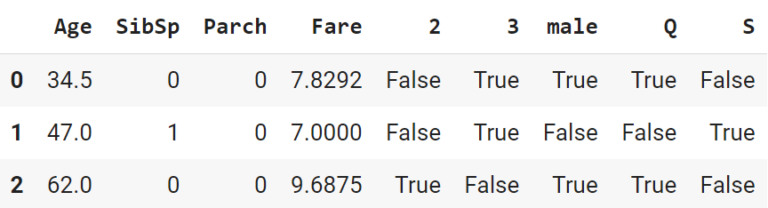

- Теперь нужно масштабировать количественные переменные. Для этого мы будем использовать те параметры (среднее арифметическое и СКО), которые мы получили при обработке обучающей выборки. Так мы сохраним единообразие изменений и избежим утечки данных (data leakage).

In [ ]:
# применим среднее арифметическое и СКО обучающей выборки для масштабирования тестовых данных
# X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])
# X_test.head(3)

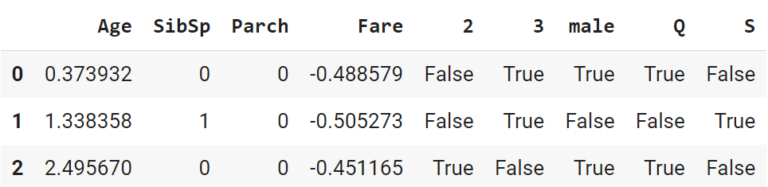

- Остается превратить название столбцов в строки.

In [19]:
# X_test.columns = X_test.columns.map(str)

- И сделать прогноз на тестовой выборке.

In [20]:
# y_pred_test = model.predict(X_test)

- На выходе мы получаем массив с прогнозами.

In [ ]:
# посмотрим на первые 10 прогнозных значений
# y_pred_test[:10]

## Этап 4. Сохранение результата в новом файле на сервере
- Теперь, когда прогноз готов, мы можем сформировать новый файл, назовем его result.csv, в котором будет содержаться id пассажира и результат, погиб или нет. Приведу пример того, что мы хотим получить.

In [21]:
# файл с примером можно загрузить не с локального компьютера, а из Интернета
# url = 'https://www.dmitrymakarov.ru/wp-content/uploads/2021/11/titanic_example.csv'

# просто поместим его url в функцию read_csv()
# example = pd.read_csv(url)
# example.head(3)

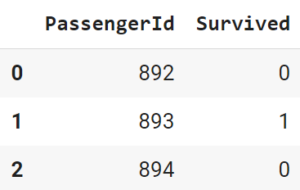

- Перед созданием нужного нам файла (1) соберем данные в новый датафрейм.

In [22]:
# возьмем индекс пассажиров из столбца PassengerId тестовой выборки
# ids = test['PassengerId']

# создадим датафрейм из словаря, в котором
# первая пара ключа и значения - это id пассажира, вторая - прогноз "на тесте"
# result = pd.DataFrame({'PassengerId': ids, 'Survived': y_pred_test})

# посмотрим, что получилось
# result.head()

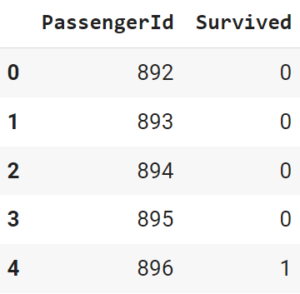

- И (2) создадим новый файл.

In [23]:
# создадим новый файл result.csv с помощью функции to_csv(), удалив при этом индекс
# result.to_csv('result.csv', index = False)

# файл будет сохранен в 'Сессионном хранилище' и, если все пройдет успешно, выведем следующий текст:
# print('Файл успешно сохранился в сессионное хранилище!')

- Новый файл появится в «Сессионном хранилище».

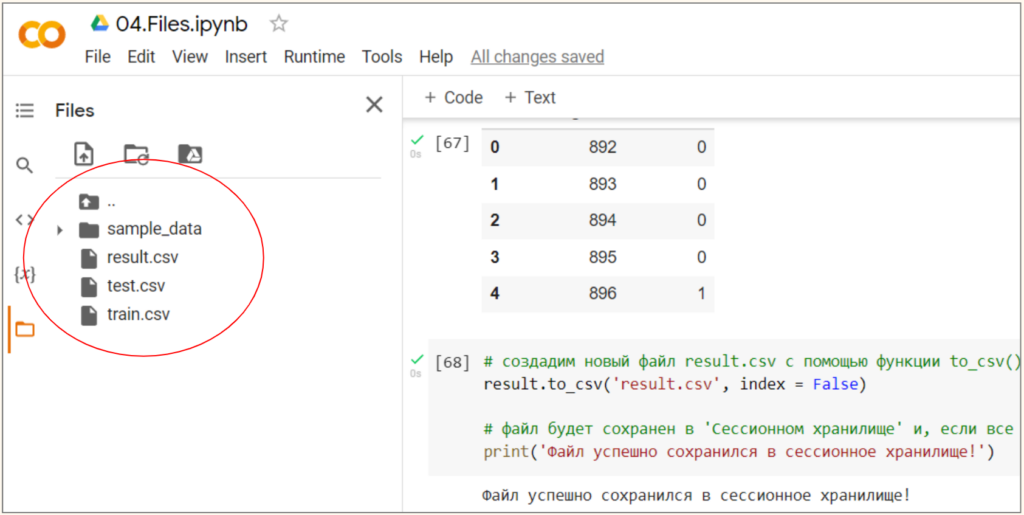

## Этап 5. Скачивание обратно на жесткий диск
- После этого мы можем скачать файл на жесткий диск.

In [24]:
# применим метод .download() объекта files
# files.download('/content/result.csv')

- Вот что у нас получилось.

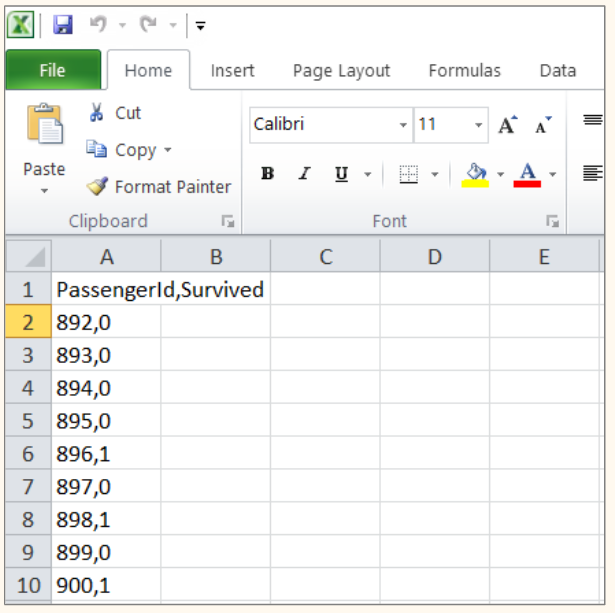

## Про соревнования на Kaggle

- Вы вероятно заметили, что мы так и не узнали насколько хорош наш алгоритм на тестовой выборке. У нас просто нет тестовой целевой переменной (y_test). Дело в том, что эти данные взяты с платформы, которая называется Kaggle⧉.
- На этой платформе проводятся соревнования по машинному обучению. Участники получают данные, строят модели и затем подгружают свой результат. Kaggle его оценивает и тот или те, чья модель наиболее точна — выигрывают.

## Соревнование «Титаник»

- «Титаник» — одно из стартовых соревнований Kaggle для новичков. Предлагаю прямо сейчас в нем поучавствовать. На странице соревнования⧉, после того как вы зарегистрировались на сайте и присоединились к самому соревнованию, у вас появится возможность подгрузить файл с результатом.
- Для этого зайдите на вкладку Submit Prediction, (1) подгрузите файл result.csv с локального компьютера и (2) нажмите кнопку Submit.

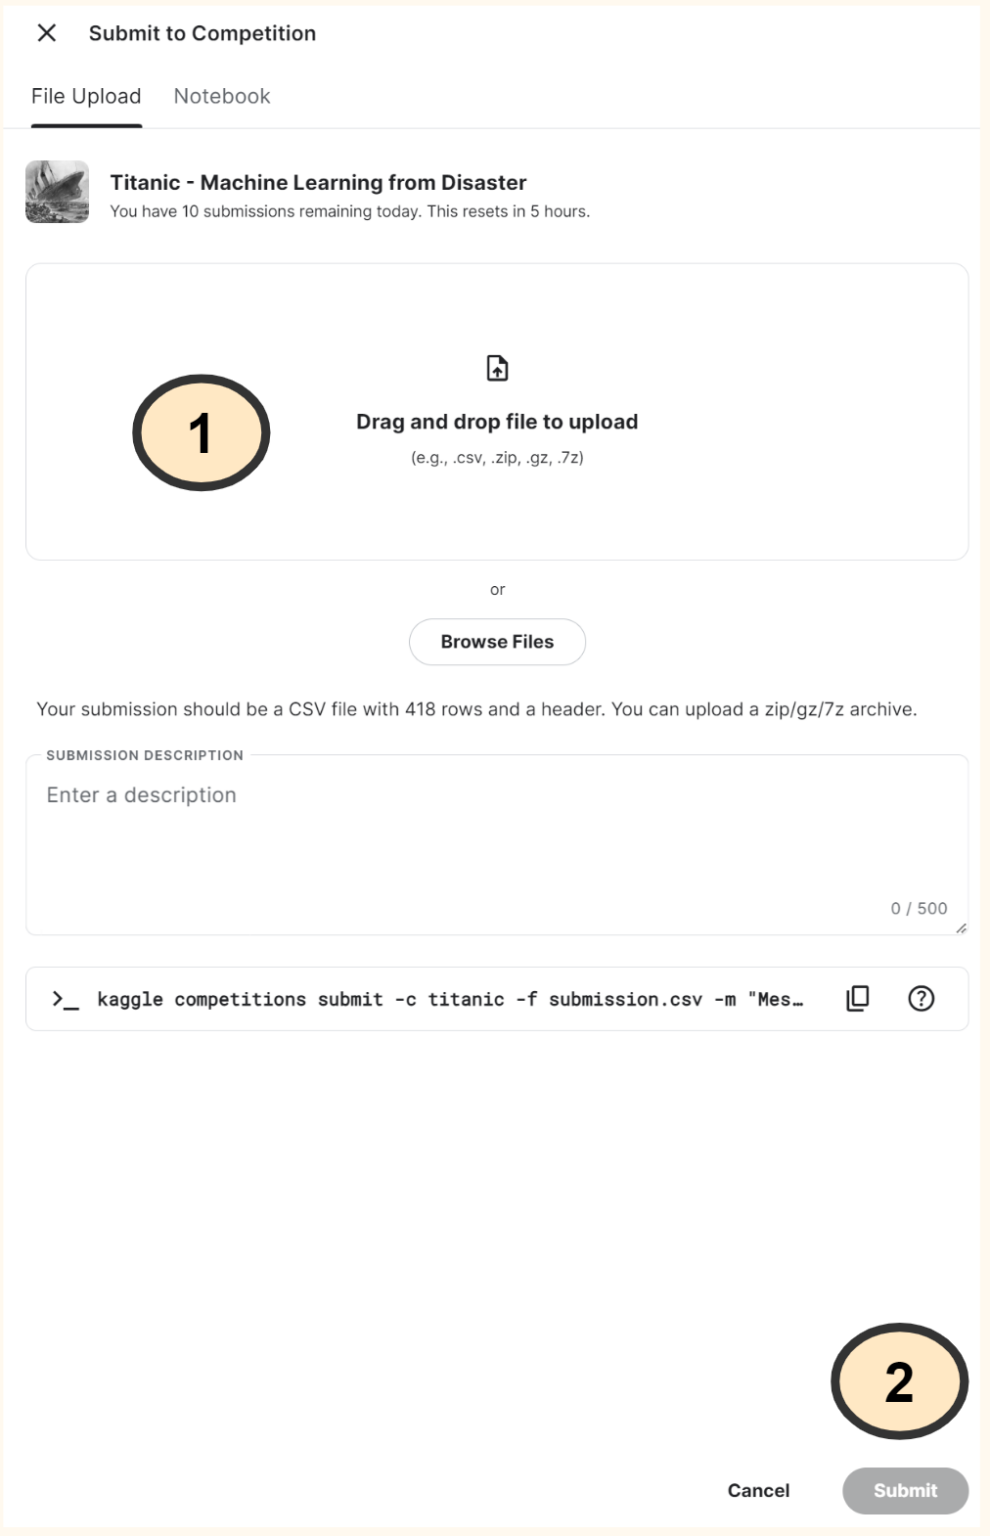

- Платформа сама рассчитает accuracy вашего прогноза «на тесте» (Score). В нашем случае accuracy составляет 0,77033 или 77,03%. Чуть хуже, чем показатель «на трейне» (напомню, там было 80,4%).
- На вкладке Leaderboard можно посмотреть ваше место в рейтинге участников.

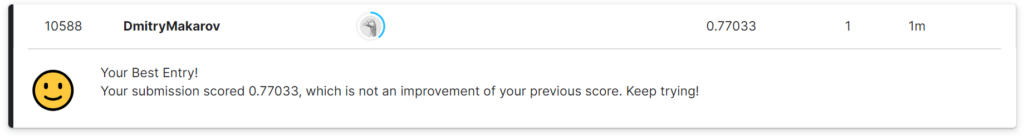

- Мы оказались на 10588-ом месте из примерно 15600 участников. Для первого раза это неплохой результат.